# 转为灰度

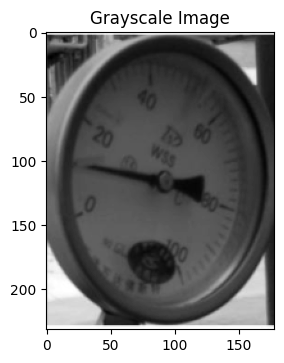

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Step 1: Read input image and convert to grayscale
input_image = cv2.imread("C:\\Users\\13157\\Desktop\\20250117144209.jpg")  # Replace with your image path
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.show()

# 自适应高斯滤波

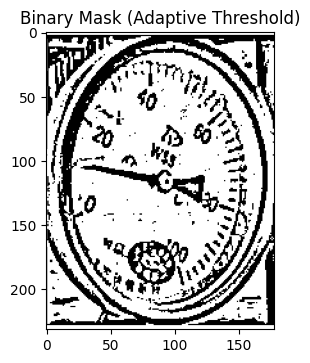

In [8]:


# Step 2: Apply adaptive thresholding
binary_mask = cv2.adaptiveThreshold(
    gray_image, 255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY, 
    11, 2  # Block size and constant C
)


    # Step 8: Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 2)
plt.title('Binary Mask (Adaptive Threshold)')
plt.imshow(binary_mask, cmap='gray')
plt.show()




找出物体轮廓椭圆

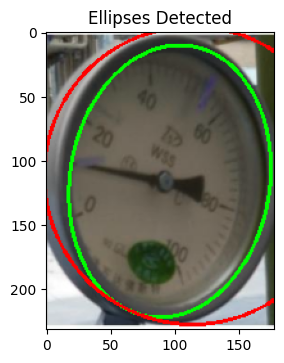

In [9]:
# 查找轮廓
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 遍历所有轮廓并检测椭圆
for contour in contours:
    if len(contour) >= 500:  # 至少需要5个点来拟合椭圆
        ellipse = cv2.fitEllipse(contour)
        # 绘制椭圆
        cv2.ellipse(input_image, ellipse, (0, 255, 0), 2)
        
        
        
        # 获取椭圆的外接圆
        (center, radius) = cv2.minEnclosingCircle(contour)
        # 绘制外接圆
        cv2.circle(input_image, (int(center[0]), int(center[1])), int(radius), (255, 0, 0), 2)

# 显示结果

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 2)
plt.title('Ellipses Detected')
plt.imshow( input_image, cmap='gray')
plt.show()